In [3]:
#https://www.kaggle.com/code/tahmidhasansakib/visual-product-recommendation-system-using-cnn
#!pip install tensorflow

In [4]:
#pip install opencv-python

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
import cv2
import pickle
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential, model_from_json


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import DenseNet121

In [6]:
df = pd.read_csv("E:/Data Science Bootcamp/Final Project/Cloths_small_dataset/new_dataset.csv",error_bad_lines=False)
df['image_jpg'] = df.apply(lambda x: str(x['image']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
print(df.shape)
df.head(5)

(4689, 3)


,image,label,image_jpg
0,00003aeb-ace5-43bf-9a0c-dc31a03e9cd2,T-Shirt,00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg
1,000d31f6-44b5-4758-8d86-c4fcfb234392,Hoodie,000d31f6-44b5-4758-8d86-c4fcfb234392.jpg
2,001068a8-86c3-4029-a9d9-1e27015e7e64,Polo,001068a8-86c3-4029-a9d9-1e27015e7e64.jpg
3,00143901-a14c-4600-960f-7747b4a3a8cd,Shirt,00143901-a14c-4600-960f-7747b4a3a8cd.jpg
4,00149032-3dd6-426e-9bc0-d53032536a42,Outwear,00149032-3dd6-426e-9bc0-d53032536a42.jpg


In [7]:
Dataframe = pd.DataFrame({
    'image_name': df['image_jpg'],
    'type': df['label']
})

# total number of entries in the dataframe
total_row = len(Dataframe)
print('total row count: ', total_row)

Dataframe.head(10)

total row count:  4689


,image_name,type
0,00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg,T-Shirt
1,000d31f6-44b5-4758-8d86-c4fcfb234392.jpg,Hoodie
2,001068a8-86c3-4029-a9d9-1e27015e7e64.jpg,Polo
3,00143901-a14c-4600-960f-7747b4a3a8cd.jpg,Shirt
4,00149032-3dd6-426e-9bc0-d53032536a42.jpg,Outwear
5,00208c77-ee58-4b63-bc1a-b9b3aa4f1be0.jpg,Outwear
6,0028956e-9962-46f0-ad45-2c42f8a59d94.jpg,Outwear
7,002e88c2-e0ce-4a4b-9670-eddc3d99accc.jpg,Undershirt
8,002eb5b8-6541-42a3-9596-0d94f7b866ae.jpg,Pants
9,00342aff-ba69-4cf2-ae62-e00680e9547a.jpg,Not sure


In [8]:
unique_types = Dataframe['type'].unique().tolist()
total_class = len(unique_types)
print(total_class)
print(unique_types)
print(unique_types[0])
print(unique_types.index(unique_types[0]))
Dataframe['number_types'] = Dataframe['type'].apply(lambda x: unique_types.index(x) if x in unique_types else 0)
Dataframe.head(10)

20
['T-Shirt', 'Hoodie', 'Polo', 'Shirt', 'Outwear', 'Undershirt', 'Pants', 'Not sure', 'Longsleeve', 'Dress', 'Body', 'Blazer', 'Hat', 'Shorts', 'Shoes', 'Skirt', 'Other', 'Top', 'Blouse', 'Skip']
T-Shirt
0


,image_name,type,number_types
0,00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg,T-Shirt,0
1,000d31f6-44b5-4758-8d86-c4fcfb234392.jpg,Hoodie,1
2,001068a8-86c3-4029-a9d9-1e27015e7e64.jpg,Polo,2
3,00143901-a14c-4600-960f-7747b4a3a8cd.jpg,Shirt,3
4,00149032-3dd6-426e-9bc0-d53032536a42.jpg,Outwear,4
5,00208c77-ee58-4b63-bc1a-b9b3aa4f1be0.jpg,Outwear,4
6,0028956e-9962-46f0-ad45-2c42f8a59d94.jpg,Outwear,4
7,002e88c2-e0ce-4a4b-9670-eddc3d99accc.jpg,Undershirt,5
8,002eb5b8-6541-42a3-9596-0d94f7b866ae.jpg,Pants,6
9,00342aff-ba69-4cf2-ae62-e00680e9547a.jpg,Not sure,7


In [9]:
Dataframe['type'].value_counts()

T-Shirt       878
Longsleeve    598
Pants         596
Shoes         377
Shirt         338
Dress         312
Shorts        277
Outwear       263
Not sure      201
Hat           148
Skirt         134
Polo          107
Undershirt     97
Blazer         93
Hoodie         89
Other          59
Body           58
Top            38
Blouse         20
Skip            6
Name: type, dtype: int64

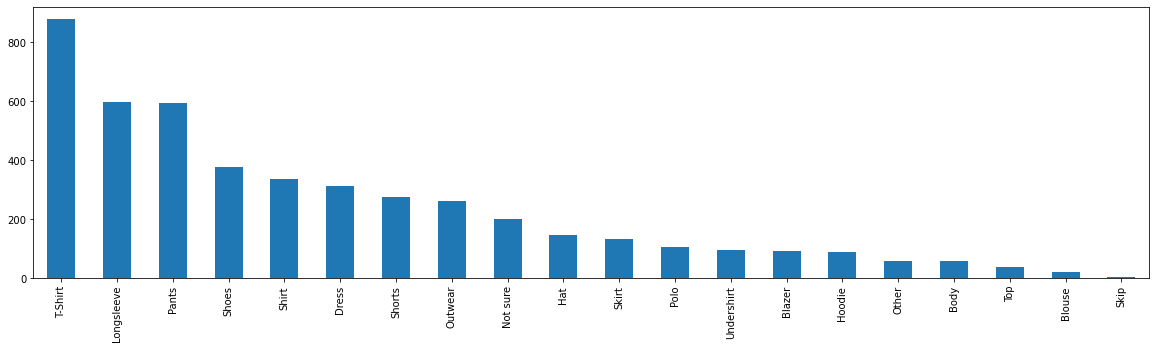

In [10]:
plt.figure(figsize=(20,5))
Dataframe['type'].value_counts().plot(kind='bar',x='type',y='image_name')
plt.show()

In [11]:
import os
DATASET_PATH = "E:/Data Science Bootcamp/Final Project/Cloths_small_dataset/images/"
list_directory = os.listdir(DATASET_PATH)
# each time directory files gets reordered. That's why needed to find where images folder is.
index=0
for i in range (len(list_directory)):
    if list_directory[i]=="images":
        index=i
        break
def getData(start,stop):
    x_data = []
    y_data = []
    #start = 0 #setting start parameter
    #stop = int(0.001*total_row) #setting stop parameter 
    
    for i in range(start, stop): 
        Image_path=DATASET_PATH+list_directory[index]+"/"+Dataframe.loc[i,'image_name']
        #print(Dataframe.loc[i,'image_name'])
        image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
        try:
            resized_img = cv2.resize(image, dsize=(28, 28))
        except:
            print("Rejected Image: "+Dataframe.loc[i,'image_name'])
            continue
        x_data.append(resized_img) 
        y_values = Dataframe.loc[i,'number_types'] # earlier it was type
        y_data.append(y_values)
                
    return x_data, y_data

<class 'list'>
[[ 49  47  35  32  44  50  54  53  56  55  54  56  54  56  56  56  57  50
   52  53  49  54  50  44  43  37  30  28]
 [ 52  52  52  52  56  55  58  58  58  58  59  57  56  58  57  57  57  56
   55  54  56  50  53  51  54  47  49  44]
 [ 52  51  35  54  55  57  59  61  58  58  61  58  60  58  57  60  58  57
   55  59  59  57  53  55  57  53  45  51]
 [ 51  48  53  57  59  62  62  62  61  59  58  60  62  59  61  58  59  61
   56  57  60  58  58  53  52  53  49  51]
 [ 49  54  57  61  62  62  64  65  64  63  63  65  65  64  65  60  64  62
   62  67  64  61  57  61  57  55  56  51]
 [ 54  60  62  62  63  63  64  64  63  65  68  66  58  63  63  69  62  63
   64  53  63  61  60  59  57  56  55  53]
 [ 60  66  66  65  66  64  67  68  69  66  70  66  64  59  69  64  59  67
   65  70  64  61  58  61  60  49  56  58]
 [ 67  67  67  66  68  68  67  70  68  66  70  69  62  64  66  61  60  65
   74  65  60  55  67  68  58  51  58  57]
 [ 68  68  69  68  68  68  69  69 160 157 163 158

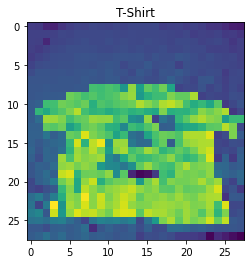

In [12]:
X=[]
Y=[]
# for now start=0,stop=(0.001*total_row)
# total_row=count of rows in augmented data frame
start = 0
stop = int(0.001*total_row) # testing with 0.1% image of the dataset
X,Y=getData(start,stop)

print(type(X))
print(X[0])
plt.title(unique_types[Y[0]])
plt.imshow(X[0])

In [13]:
X = np.array(X).reshape(-1, 28,28,1)
Y = np.array(Y)
len(Y)

4

In [14]:
X = X/255.0
len(X)

4

In [15]:
Y = Y.reshape(len(X),)
Y

array([0, 1, 2, 3], dtype=int64)

In [16]:
print(type(X))
print(X.shape)
print(Y.shape)
print(X[0])
print(Y[0])

<class 'numpy.ndarray'>
(4, 28, 28, 1)
(4,)
[[[0.19215686]
  [0.18431373]
  [0.1372549 ]
  [0.1254902 ]
  [0.17254902]
  [0.19607843]
  [0.21176471]
  [0.20784314]
  [0.21960784]
  [0.21568627]
  [0.21176471]
  [0.21960784]
  [0.21176471]
  [0.21960784]
  [0.21960784]
  [0.21960784]
  [0.22352941]
  [0.19607843]
  [0.20392157]
  [0.20784314]
  [0.19215686]
  [0.21176471]
  [0.19607843]
  [0.17254902]
  [0.16862745]
  [0.14509804]
  [0.11764706]
  [0.10980392]]

 [[0.20392157]
  [0.20392157]
  [0.20392157]
  [0.20392157]
  [0.21960784]
  [0.21568627]
  [0.22745098]
  [0.22745098]
  [0.22745098]
  [0.22745098]
  [0.23137255]
  [0.22352941]
  [0.21960784]
  [0.22745098]
  [0.22352941]
  [0.22352941]
  [0.22352941]
  [0.21960784]
  [0.21568627]
  [0.21176471]
  [0.21960784]
  [0.19607843]
  [0.20784314]
  [0.2       ]
  [0.21176471]
  [0.18431373]
  [0.19215686]
  [0.17254902]]

 [[0.20392157]
  [0.2       ]
  [0.1372549 ]
  [0.21176471]
  [0.21568627]
  [0.22352941]
  [0.23137255]
  [0.23

In [17]:
X=[]
Y=[]
start = 0
stop = total_row
X,Y=getData(start,stop)

# conversion into numpy array
X = np.array(X).reshape(-1, 28,28,1)
Y = np.array(Y)

# normalizing
X = X/255

# processing Y_train for dimension matching
Y = Y.reshape(len(X),)

Rejected Image: dec324bf-c2ff-4c7b-8d5a-96f17be58eb8.jpg


In [18]:
print('Image Data Shape: ',X.shape)
print('Label Data Shape: ',Y.shape)

Image Data Shape:  (4688, 28, 28, 1)
Label Data Shape:  (4688,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 500)
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Test Image Data Shape: ',X_test.shape)
print('Test Label Data Shape: ',Y_test.shape)

Train Image Data Shape:  (4219, 28, 28, 1)
Train Label Data Shape:  (4219,)
Test Image Data Shape:  (469, 28, 28, 1)
Test Label Data Shape:  (469,)


In [20]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 500)
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Validation Image Data Shape: ',X_validate.shape)
print('Validation Label Data Shape: ',Y_validate.shape)

Train Image Data Shape:  (3797, 28, 28, 1)
Train Label Data Shape:  (3797,)
Validation Image Data Shape:  (422, 28, 28, 1)
Validation Label Data Shape:  (422,)


In [21]:
#CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
import datetime, os
from tensorflow.keras.callbacks import TensorBoard

In [22]:
def build_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Flatten())
    cnn_model.add(Dense(units = 512, activation = 'relu'))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Dense(units = total_class, activation = 'softmax'))
    return cnn_model


model=build_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [239]:
def train_model(model):
    model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
    history = model.fit(X_train, Y_train, batch_size = 128, epochs = 100, verbose = 1, validation_data = (X_validate, Y_validate))
#     model.fit(X_train, Y_train, epochs=50, batch_size=512, validation_split=0.2)

train_model(model)

Epoch 1/100
33/33 [==============================] - 4s 71ms/step - loss: 2.6868 - accuracy: 0.1688 - val_loss: 2.6023 - val_accuracy: 0.2251
Epoch 2/100
33/33 [==============================] - 2s 57ms/step - loss: 2.5973 - accuracy: 0.1998 - val_loss: 2.5297 - val_accuracy: 0.2441
Epoch 3/100
33/33 [==============================] - 2s 55ms/step - loss: 2.4824 - accuracy: 0.2451 - val_loss: 2.3369 - val_accuracy: 0.3128
Epoch 4/100
33/33 [==============================] - 2s 57ms/step - loss: 2.3559 - accuracy: 0.2840 - val_loss: 2.2025 - val_accuracy: 0.3578
Epoch 5/100
33/33 [==============================] - 2s 57ms/step - loss: 2.2592 - accuracy: 0.3207 - val_loss: 2.1163 - val_accuracy: 0.3981
Epoch 6/100
33/33 [==============================] - 2s 62ms/step - loss: 2.1834 - accuracy: 0.3508 - val_loss: 2.0123 - val_accuracy: 0.4289
Epoch 7/100
33/33 [==============================] - 2s 68ms/step - loss: 2.1002 - accuracy: 0.3823 - val_loss: 1.9677 - val_accuracy: 0.4384
Epoch 

Text(0.5, 1.0, 'Accuracy evolution')

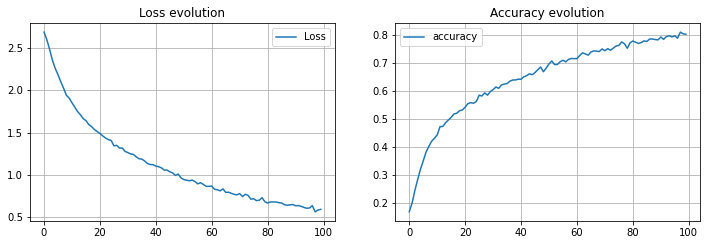

In [240]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model.history.history['loss'], label='Loss')
# plt.plot(model.history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(model.history.history['accuracy'], label='accuracy')
# plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')


In [243]:
from keras import models
model = models.load_model('visual_product_recommend.h5')

In [244]:
model.save('visual_product_recommend.h5')

In [26]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [245]:
#predicted_classes = model.predict_classes(X_test)
predict_x=model.predict(X_test) 
predicted_classes=np.argmax(predict_x,axis=1)

15/15 [==============================] - 0s 4ms/step


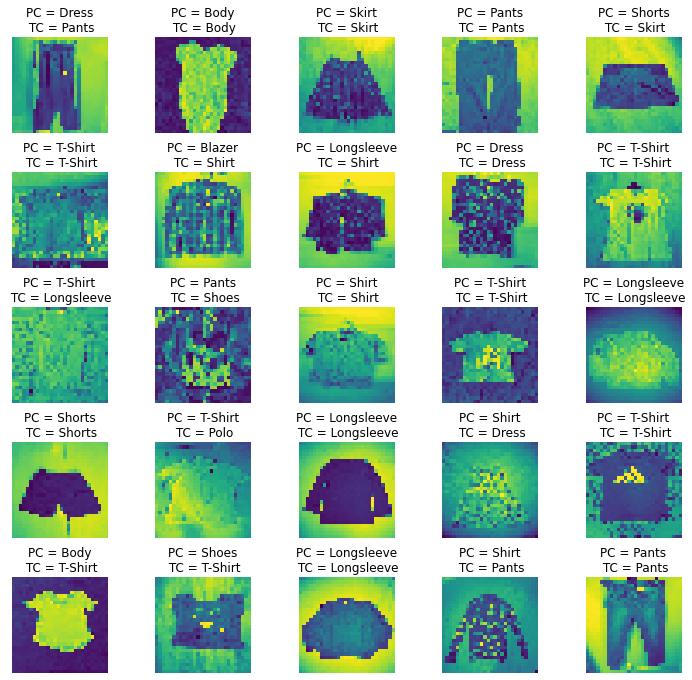

In [246]:
#PC=PredictedClass #TC=TrueClass
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"PC = {unique_types[predicted_classes[i]]}\n TC = {unique_types[Y_test[i]]}") #predicted_classes[i]:0.1f #Y_test[i]:0.1f
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

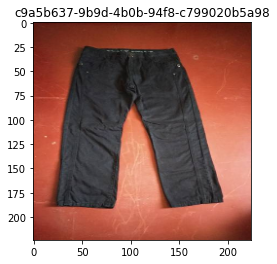

In [262]:
#Dataframe.head(10)
def load_image(i):
    Image_path=DATASET_PATH+list_directory[index]+"/"+Dataframe.loc[i,'image_name']
    Image_id=Dataframe.loc[i,'image_name'].split(".")
    res=Image_id[0]
    image = cv2.imread(Image_path,cv2.IMREAD_COLOR)
    resized_img = cv2.resize(image, dsize=(224, 224))
    return resized_img,res
img,img_id = load_image(4200)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title(img_id)
plt.imshow(img)

In [263]:
def make_prediction(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    resized_img = cv2.resize(img, dsize=(28, 28))
    x_data = np.array(resized_img).reshape(-1, 28,28,1)
    x_data=x_data/255
#     print(x_data)
#     print(x_data.shape)
    result=model.predict(x_data)
#     print(type(result))
#     print(np.argmax(result))
    return x_data,unique_types[np.argmax(result)]

numpy_image,result=make_prediction(img)
print(result)

1/1 [==============================] - 0s 28ms/step
Pants


In [267]:
typeList=[]
for i, row in df.iterrows(): 
    if(row["label"]==result):
        #print(row["id"],row["articleType"])
        if(img_id!=str(row["image"])):
            typeList.append(row['image'])
            #typeList.append(row['label'])
            
            
print(typeList) 

['002eb5b8-6541-42a3-9596-0d94f7b866ae', '0098b991-e36e-4ef1-b5ee-4154b21e2a92', '01033304-f9a4-48c4-af65-677512880fae', '012d1ca9-baaf-4b01-8b60-955f3408b1b7', '0237ad41-08b8-474e-9ba2-7fc342e6b8db', '0257eb81-f3d3-4704-8299-8b6ab20f1ed4', '027a10cb-97f0-46f3-b670-611e481bb8fe', '027c81f2-c6e1-498a-8f69-823ce631438e', '030a5708-f6d7-441f-86ee-0b51b33f3f51', '03229a43-ab8f-4fdc-ae53-75d64d300b44', '03383314-4e34-4604-8ba0-f5d75371204f', '03a43dea-405e-4a11-9716-2f790a95f699', '03b5fa92-c65d-4b45-820b-967e85f41ee2', '041cea74-d96a-45ff-a8e2-d311ee0f21d8', '046b4028-ff00-4df3-a69e-d652c357e497', '046d0a65-f5a6-47f6-afaf-e692bfcfcb00', '0577a46b-53d1-4de1-a0e9-bec8992a6f59', '05814dc4-0520-47e6-91e0-402a971ba40a', '05e280ef-53d9-497f-be09-e83c549f0a14', '062752a8-2cbd-434f-b850-4a4f85c32cb3', '06697086-d232-4c13-a5ea-ebd759b53bc6', '07203b6c-8d84-4a31-ac32-78b0a66de843', '073f2d48-e363-474d-acbe-11103356e7e2', '07b616c7-1ac6-48ea-8517-f0bc8d4ad4ec', '081b5ec1-13a6-43c8-991f-9ad2020f646a',

Text(0.5, 1.0, '002eb5b8-6541-42a3-9596-0d94f7b866ae')

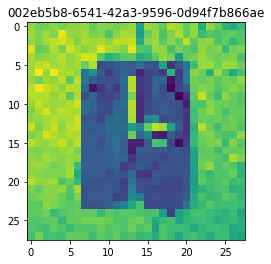

In [268]:
i=0
X_similar=[]
X_id_similar=[]
X_numpy=[]
for imageId in typeList:
#     print(imageId)
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(imageId)+".jpg"
    image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
    try:
        resized_img = cv2.resize(image, dsize=(28,28))
    except:
        print("can't read file: ", str(imageId)+".jpg")
    X_similar.append(resized_img)
    X_id_similar.append(imageId)
        
X_numpy = np.array(X_similar).reshape(-1, 28,28,1)
X_numpy = X_numpy/255
#print(X_numpy[0])

plt.imshow(X_similar[0])
plt.title(X_id_similar[0])

In [269]:
#Recommendation
import math
def calculateDistance(i1, i2):
    return math.sqrt(np.sum((i1-i2)**2))

print(calculateDistance(numpy_image,X_numpy[0]))

11.127422475561659


In [270]:
distance_list=[]
for i in range (0, len(X_numpy)):
    distance_list.append(calculateDistance(numpy_image,X_numpy[i]))

sorted_distance_list=distance_list.copy()
#print(distance_list)
sorted_distance_list.sort()

least_ten_distance=sorted_distance_list[0:10]
print(least_ten_distance)
index_distance=[]
for i in range (0, len(least_ten_distance)-1):
    if(least_ten_distance[i]!=least_ten_distance[i+1]):
        index_distance.append(distance_list.index(least_ten_distance[i]))

index_distance=index_distance[0:5]

print(index_distance)

[3.773009633125399, 3.8231472911117086, 4.1535354793338835, 4.350872145619528, 4.748632616475939, 4.751035015425675, 4.759726277107467, 4.803390126666591, 4.809816311343482, 4.840345309411369]
[523, 78, 512, 491, 355]


002eb5b8-6541-42a3-9596-0d94f7b866ae
0098b991-e36e-4ef1-b5ee-4154b21e2a92
01033304-f9a4-48c4-af65-677512880fae
012d1ca9-baaf-4b01-8b60-955f3408b1b7
0237ad41-08b8-474e-9ba2-7fc342e6b8db


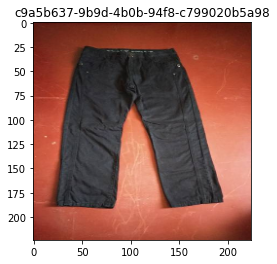

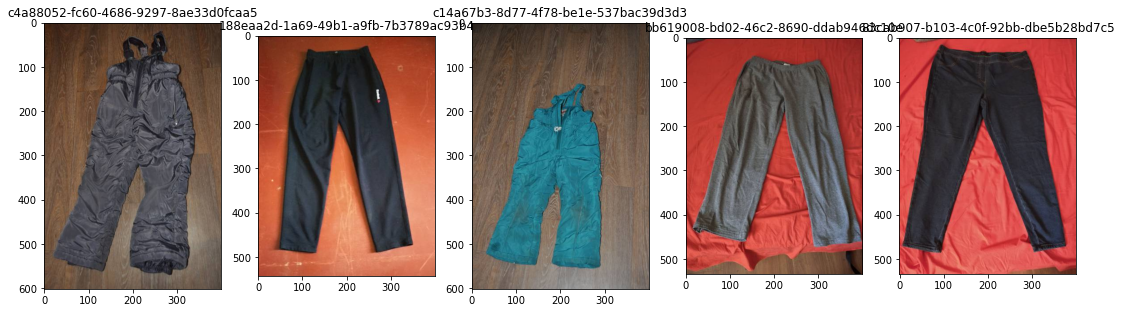

In [271]:
# Image_path=DATASET_PATH+list_directory[index]+"/"+str(img_id)+".jpg"
# src = cv2.imread(Image_path)
# image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.title(img_id)

fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
for i in range(0,len(index_distance)):
    print(X_id_similar[i])
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(X_id_similar[index_distance[i]])+".jpg"
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(1,5, i+1))
    subplot_title=str(X_id_similar[index_distance[i]])
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)
    
fig.tight_layout()
plt.show()